### Recipes 5k

* [Dataset](http://www.ub.edu/cvub/recipes5k/)

* [Original Paper](https://www.researchgate.net/publication/318729535_Food_Ingredients_Recognition_through_Multi-label_Learning)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import process_labels, split_data
from src.classifiers_base import preprocess_df

from transformers import BertTokenizer

from src.multimodal_data_loader import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_base_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'datasets/Recipes5k/'

In [3]:
text_path = os.path.join(PATH, 'labels.csv')
images_path = os.path.join(PATH, 'images')

## Get data

In [4]:
df = pd.read_csv(text_path)
df

,image,class,split,ingredients
0,onion_rings/0_einkorn_onion_rings_hostedLargeU...,onion_rings,val,"yellow onion,flour,baking powder,seasoning sal..."
1,onion_rings/1_crispy_onion_rings_hostedLargeUr...,onion_rings,train,"white onion,panko,cornmeal,ground paprika,onio..."
2,onion_rings/2_onion_rings_hostedLargeUrl.jpg,onion_rings,train,"yellow onion,all-purpose flour,baking powder,l..."
3,onion_rings/3_onion_rings_hostedLargeUrl.jpg,onion_rings,train,"oil,pancake mix,spanish onion"
4,onion_rings/4_onion_rings_hostedLargeUrl.jpg,onion_rings,train,"peanut oil,sweet onion,flour,eggs,celery salt,..."
...,...,...,...,...
4821,chocolate_ice_cream/45_chocolate_ice_cream_hos...,chocolate_ice_cream,train,"dark chocolate,whole milk,unsweetened cocoa po..."
4822,chocolate_ice_cream/46_dark_chocolate_ice_crea...,chocolate_ice_cream,train,"half & half,whole milk,heavy cream,sugar,sea s..."
4823,chocolate_ice_cream/47_the_darkest_chocolate_i...,chocolate_ice_cream,train,"unsweetened cocoa powder,brewed coffee,granula..."
4824,chocolate_ice_cream/48_homemade_chocolate_ice_...,chocolate_ice_cream,train,"unsweetened cocoa powder,sugar,firmly packed b..."


## Data Perparation

In [5]:
# Select features and labels vectors
text_columns = 'ingredients'
image_columns = 'image'
label_columns = 'class'

df = preprocess_df(df, image_columns, images_path)

# Split the data
train_df, test_df = split_data(df)

# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)

100%|██████████| 4826/4826 [00:00<00:00, 6019.14it/s]


Train Shape: (3409, 4)
Test Shape: (783, 4)


In [6]:
# Instantiate tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 2e582377-ae15-45f6-9adc-4490a05c76bc)')' thrown while requesting HEAD https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json


In [7]:
train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns, tokenizer)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

### Models

In [8]:
output_size = len(mlb.classes_)
multilabel = False

Training Early Fusion Model:


'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 3fec53fd-1720-445d-aab8-8716bcd18637)')' thrown while requesting HEAD https://huggingface.co/bert-base-uncased/resolve/main/config.json
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 6372e162-41d4-41db-9f4e-683cbe8f2d87)')' thrown while requesting HEAD https://huggingface.co/bert-base-uncased/resolve/main/config.json
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: e759522e-4d78-4b2a-889c-e6c2d7aec14b)')' thrown while requesting HEAD https://huggingface.co/google/vit-base-patch16-224-in21k/resolve/main/config.json
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: c1dc0b67-ec63-4fc7-8d21-76059abac9e6)')' thrown while requesting HEAD https:

Model Memory Usage: 747.99 MB
The number of parameters of the model are: 210021


STAGE:2024-02-10 20:33:13 35923:35923 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.6271, macro-f1: 0.5791
Epoch 1/15 - Training Time: 115.37 seconds | Inference Time: 26.03 seconds
Epoch 2/15 - Test Accuracy: 0.7139, macro-f1: 0.6736
Epoch 2/15 - Training Time: 107.63 seconds | Inference Time: 25.91 seconds
Epoch 3/15 - Test Accuracy: 0.7420, macro-f1: 0.7128
Epoch 3/15 - Training Time: 107.43 seconds | Inference Time: 26.21 seconds
Epoch 4/15 - Test Accuracy: 0.7586, macro-f1: 0.7322
Epoch 4/15 - Training Time: 110.05 seconds | Inference Time: 26.75 seconds
Epoch 5/15 - Test Accuracy: 0.7905, macro-f1: 0.7792
Epoch 5/15 - Training Time: 110.81 seconds | Inference Time: 25.30 seconds
Epoch 6/15 - Test Accuracy: 0.7803, macro-f1: 0.7651
Epoch 6/15 - Training Time: 109.43 seconds | Inference Time: 26.38 seconds
Epoch 7/15 - Test Accuracy: 0.8008, macro-f1: 0.7865
Epoch 7/15 - Training Time: 111.87 seconds | Inference Time: 26.22 seconds
Epoch 8/15 - Test Accuracy: 0.7880, macro-f1: 0.7666
Epoch 8/15 - Training Time: 105.33 seconds | Infere

STAGE:2024-02-10 21:07:28 35923:35923 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-10 21:07:29 35923:35923 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                   DataParallel.forward         3.98%       80.012s        99.01%     1991.297s        1.981s     374.57 Mb  -14875.79 Gb          1005  
                                         training_batch         0.21%        4.243s        81.00%     1629.122s        2.011s     -28.70 Gb     -28.73 Gb           810  
                                           aten::linear         0.20%        3.935s        67.30%     1353.593s       9.100ms    4799.46 Gb       6.29

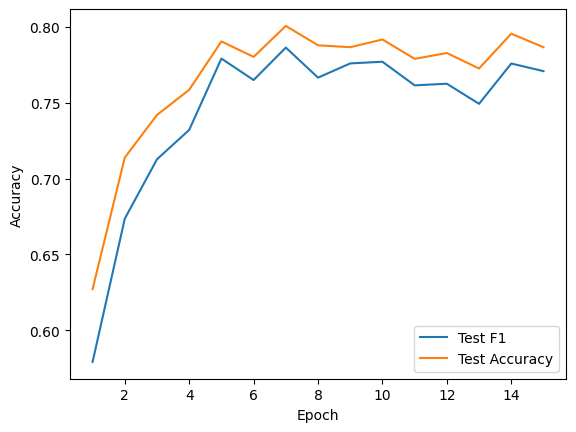

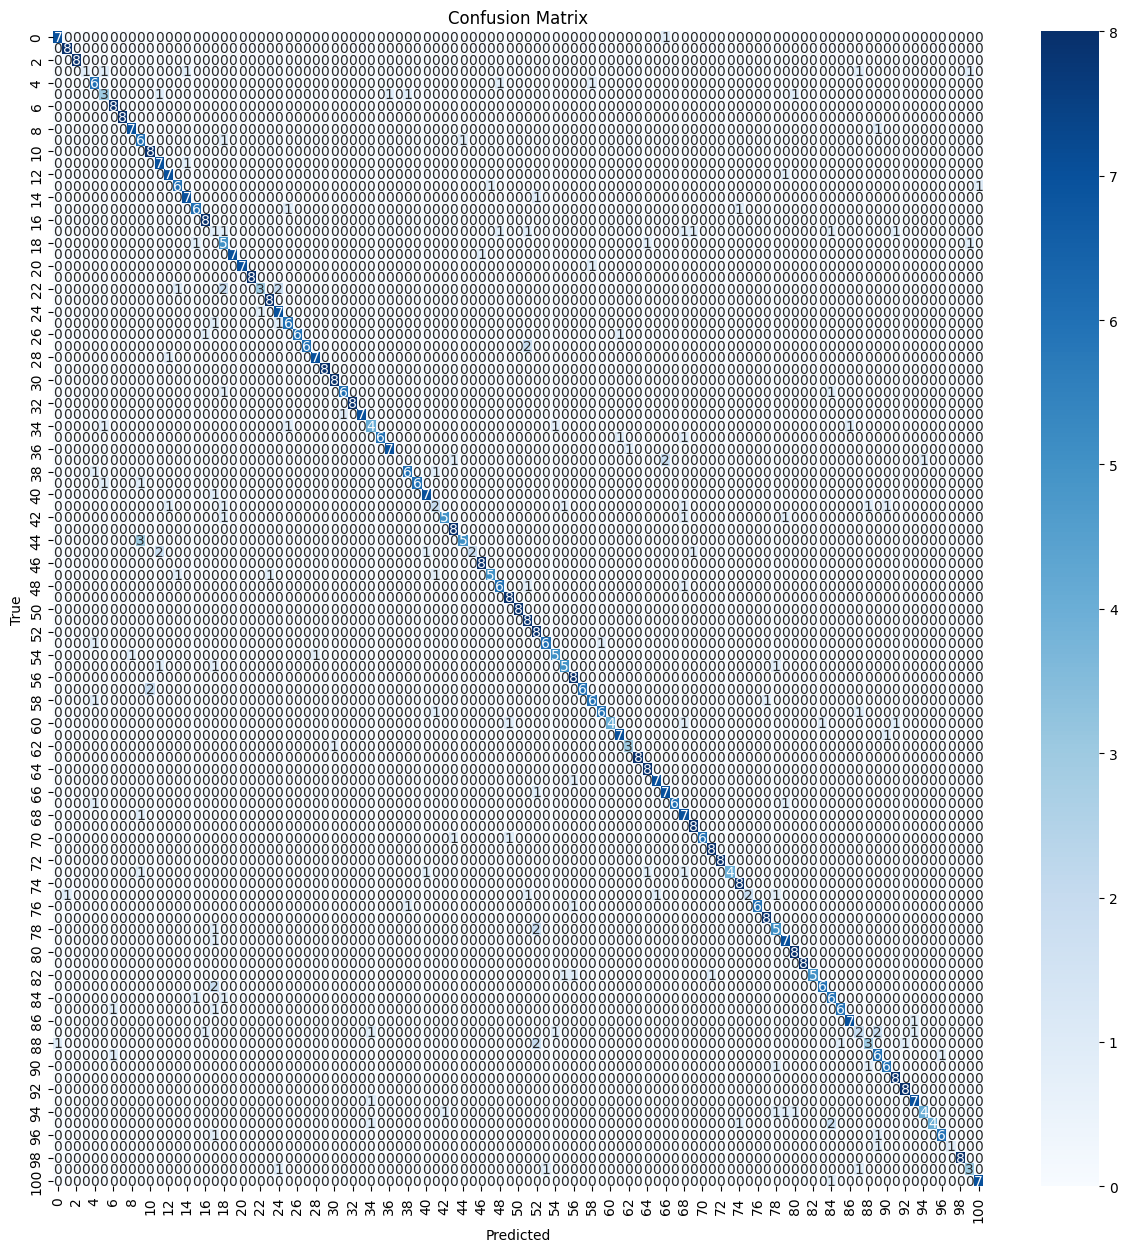

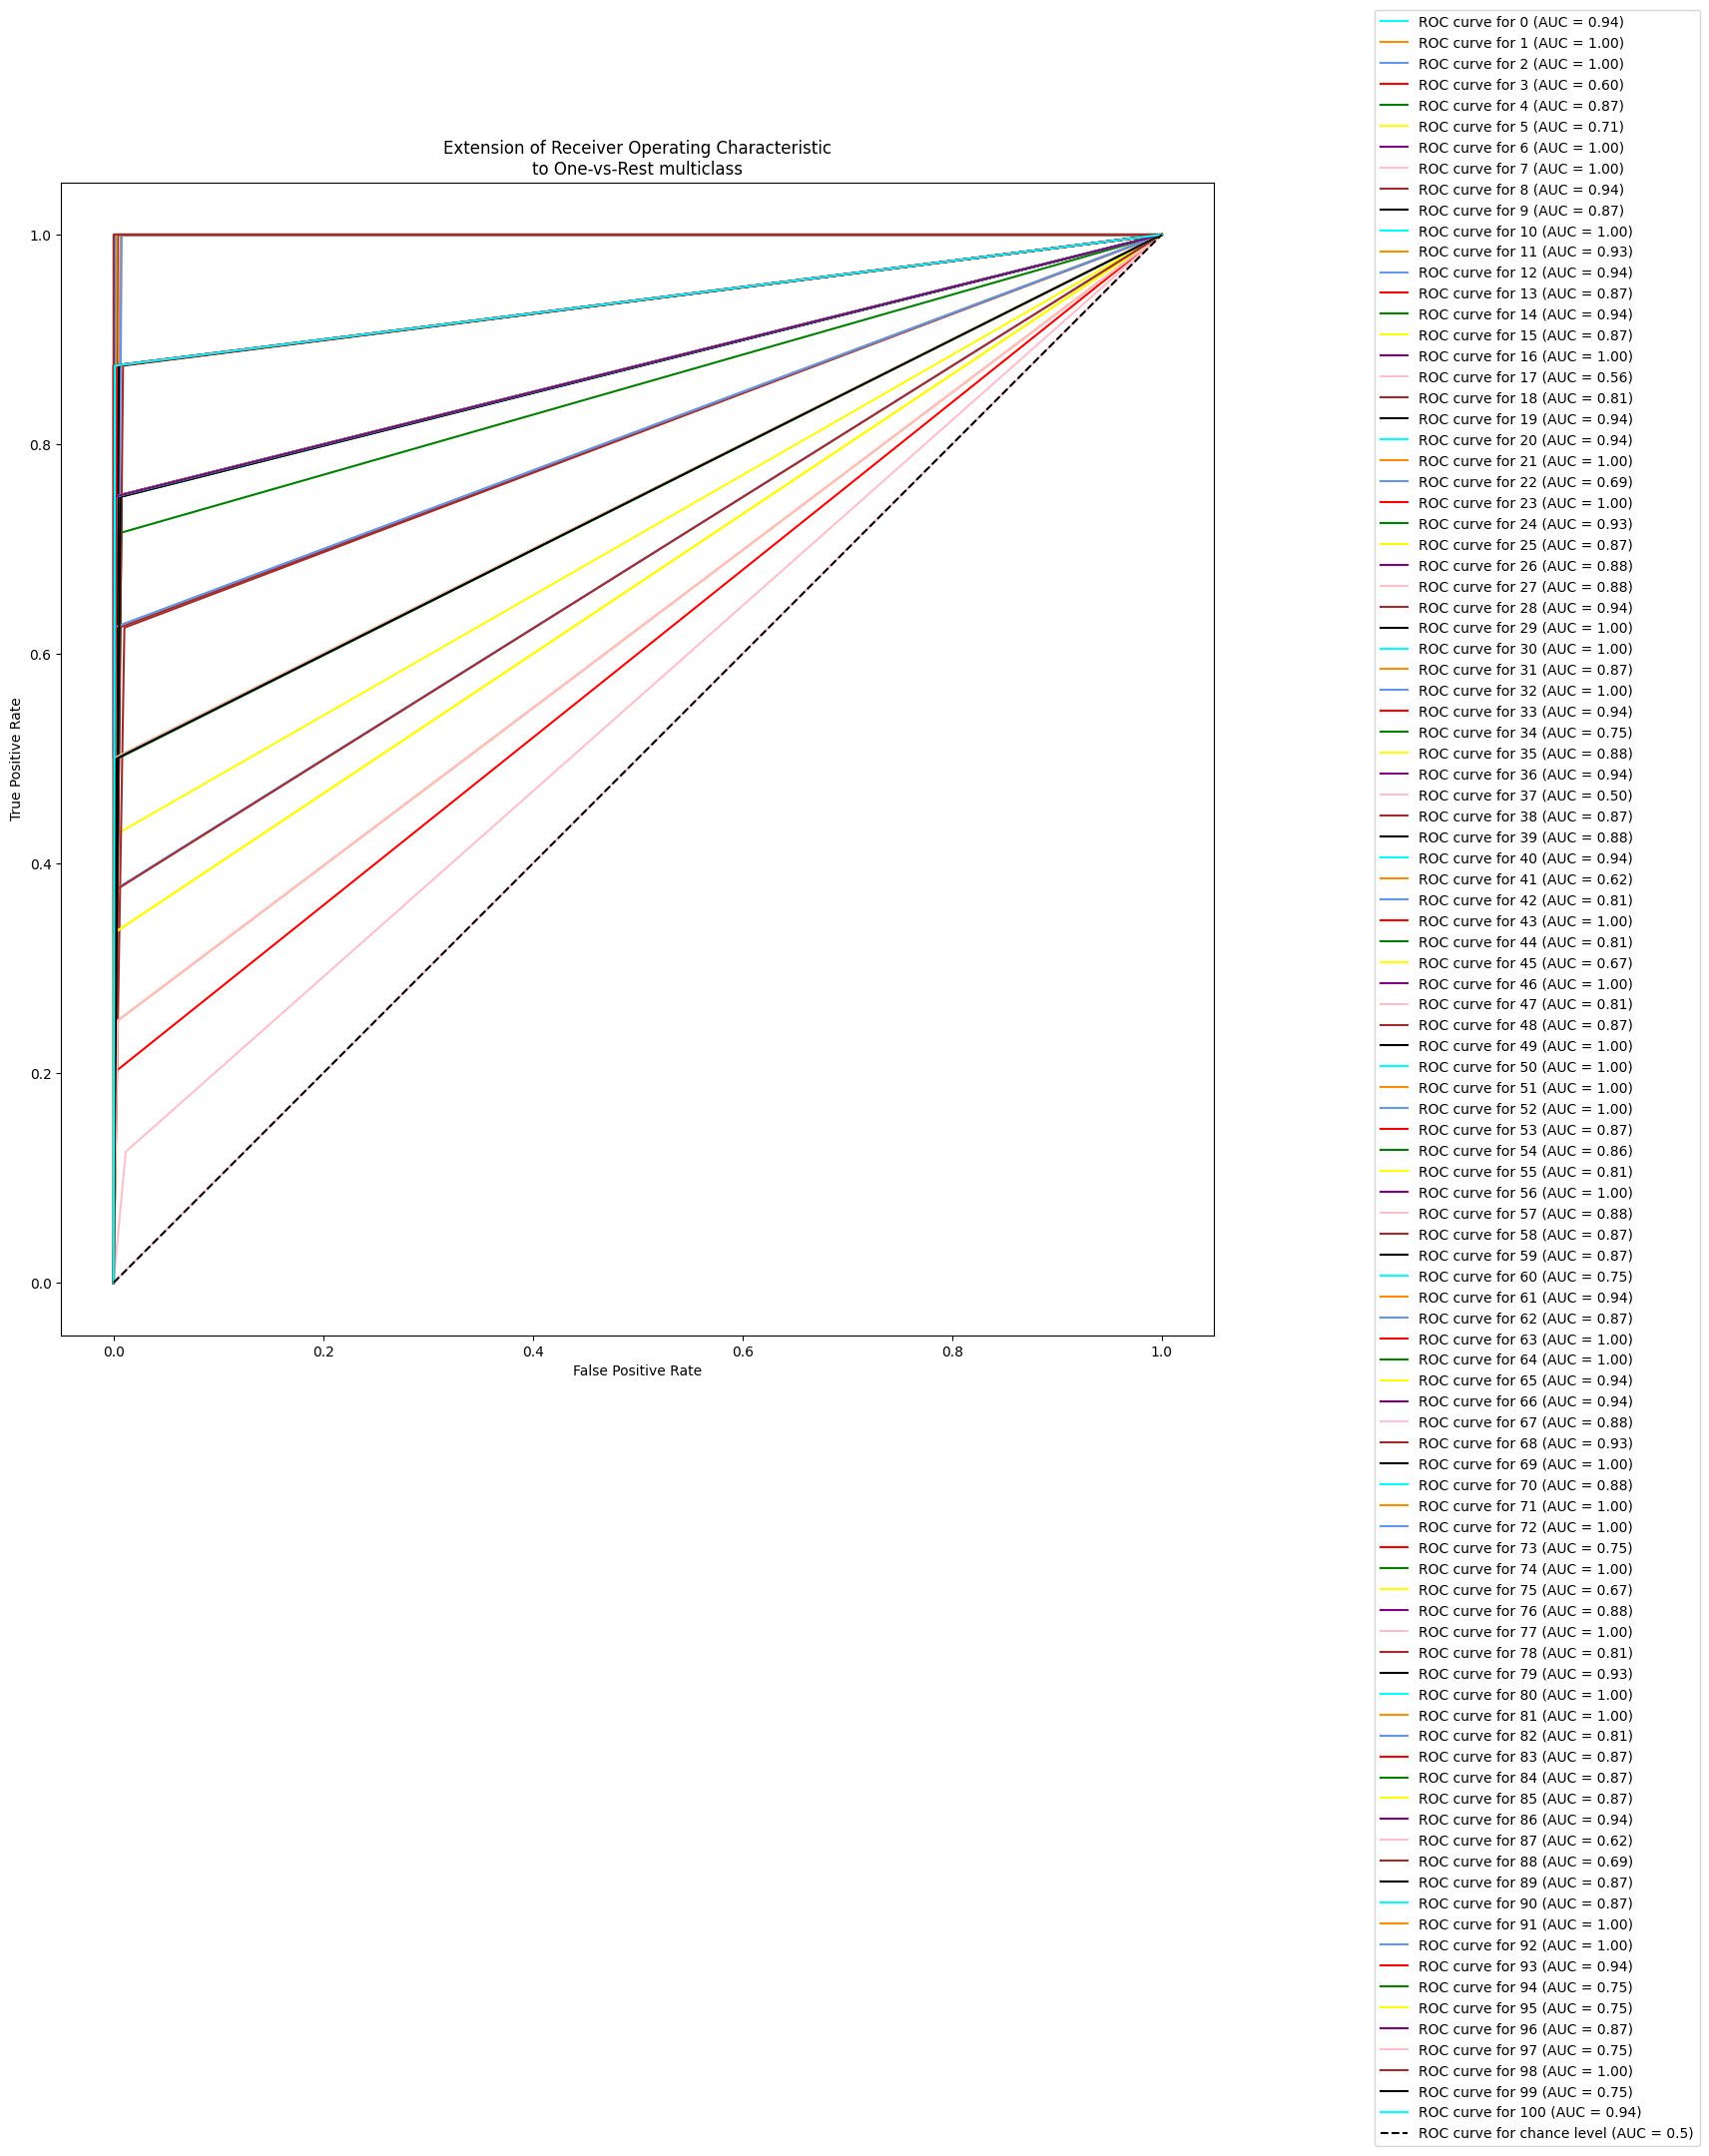

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.89      1.00      0.94         8
           2       1.00      1.00      1.00         8
           3       1.00      0.20      0.33         5
           4       0.60      0.75      0.67         8
           5       0.50      0.43      0.46         7
           6       0.80      1.00      0.89         8
           7       1.00      1.00      1.00         8
           8       0.88      0.88      0.88         8
           9       0.50      0.75      0.60         8
          10       0.80      1.00      0.89         8
          11       0.64      0.88      0.74         8
          12       0.78      0.88      0.82         8
          13       0.75      0.75      0.75         8
          14       0.78      0.88      0.82         8
          15       0.75      0.75      0.75         8
          16       0.80      1.00      0.89         8
          17       0.10    

In [9]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, output_size, num_epochs=15, multilabel=multilabel, report=True)

Training Late Fusion Model:
Model Memory Usage: 747.62 MB
The number of parameters of the model are: 111717


STAGE:2024-02-10 21:15:58 35923:35923 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.5236, macro-f1: 0.4661
Epoch 1/15 - Training Time: 106.43 seconds | Inference Time: 27.63 seconds
Epoch 2/15 - Test Accuracy: 0.6424, macro-f1: 0.5997
Epoch 2/15 - Training Time: 115.82 seconds | Inference Time: 27.94 seconds
Epoch 3/15 - Test Accuracy: 0.7101, macro-f1: 0.6710
Epoch 3/15 - Training Time: 109.57 seconds | Inference Time: 27.67 seconds
Epoch 4/15 - Test Accuracy: 0.7229, macro-f1: 0.6959
Epoch 4/15 - Training Time: 112.44 seconds | Inference Time: 27.72 seconds
Epoch 5/15 - Test Accuracy: 0.7510, macro-f1: 0.7269
Epoch 5/15 - Training Time: 113.51 seconds | Inference Time: 28.46 seconds
Epoch 6/15 - Test Accuracy: 0.7395, macro-f1: 0.7164
Epoch 6/15 - Training Time: 118.13 seconds | Inference Time: 28.06 seconds
Epoch 7/15 - Test Accuracy: 0.7420, macro-f1: 0.7198
Epoch 7/15 - Training Time: 112.64 seconds | Inference Time: 27.71 seconds
Epoch 8/15 - Test Accuracy: 0.7599, macro-f1: 0.7417
Epoch 8/15 - Training Time: 114.70 seconds | Infere

STAGE:2024-02-10 22:13:21 35923:35923 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-10 22:13:29 35923:35923 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                   DataParallel.forward         5.40%      165.951s        95.85%     2947.082s        2.932s     374.57 Mb  -14874.04 Gb          1005  
                                         training_batch         0.13%        4.137s        83.84%     2577.727s        3.182s     -28.71 Gb     -28.73 Gb           810  
                                           aten::linear         0.15%        4.475s        53.87%     1656.251s      11.060ms    4799.46 Gb       4.12

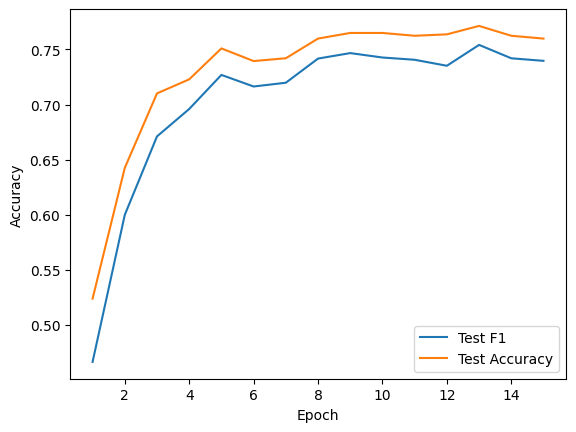

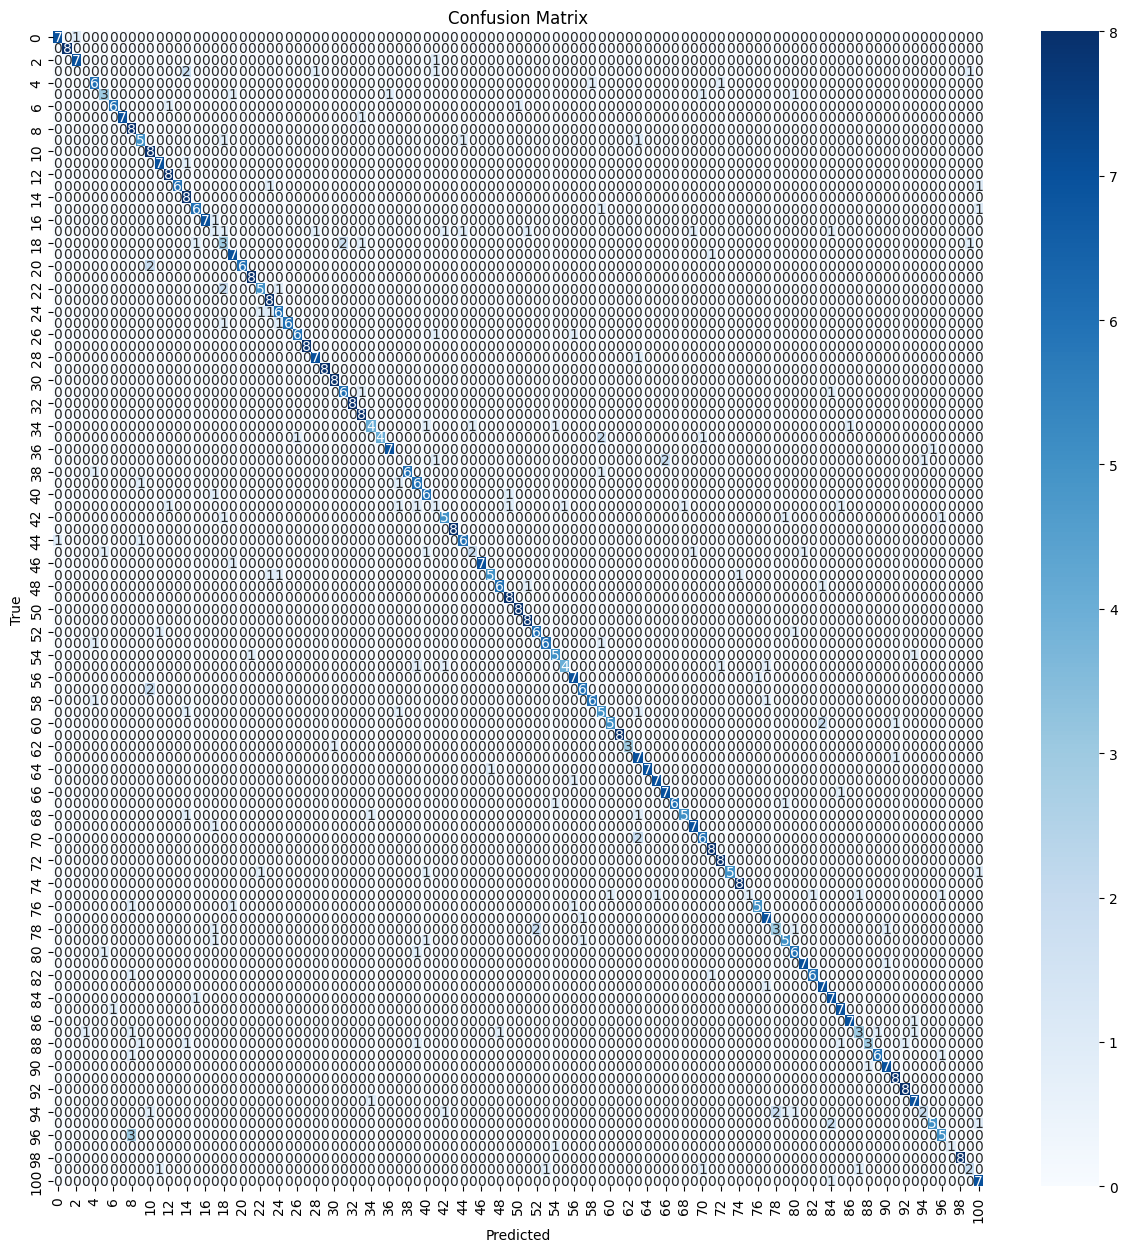

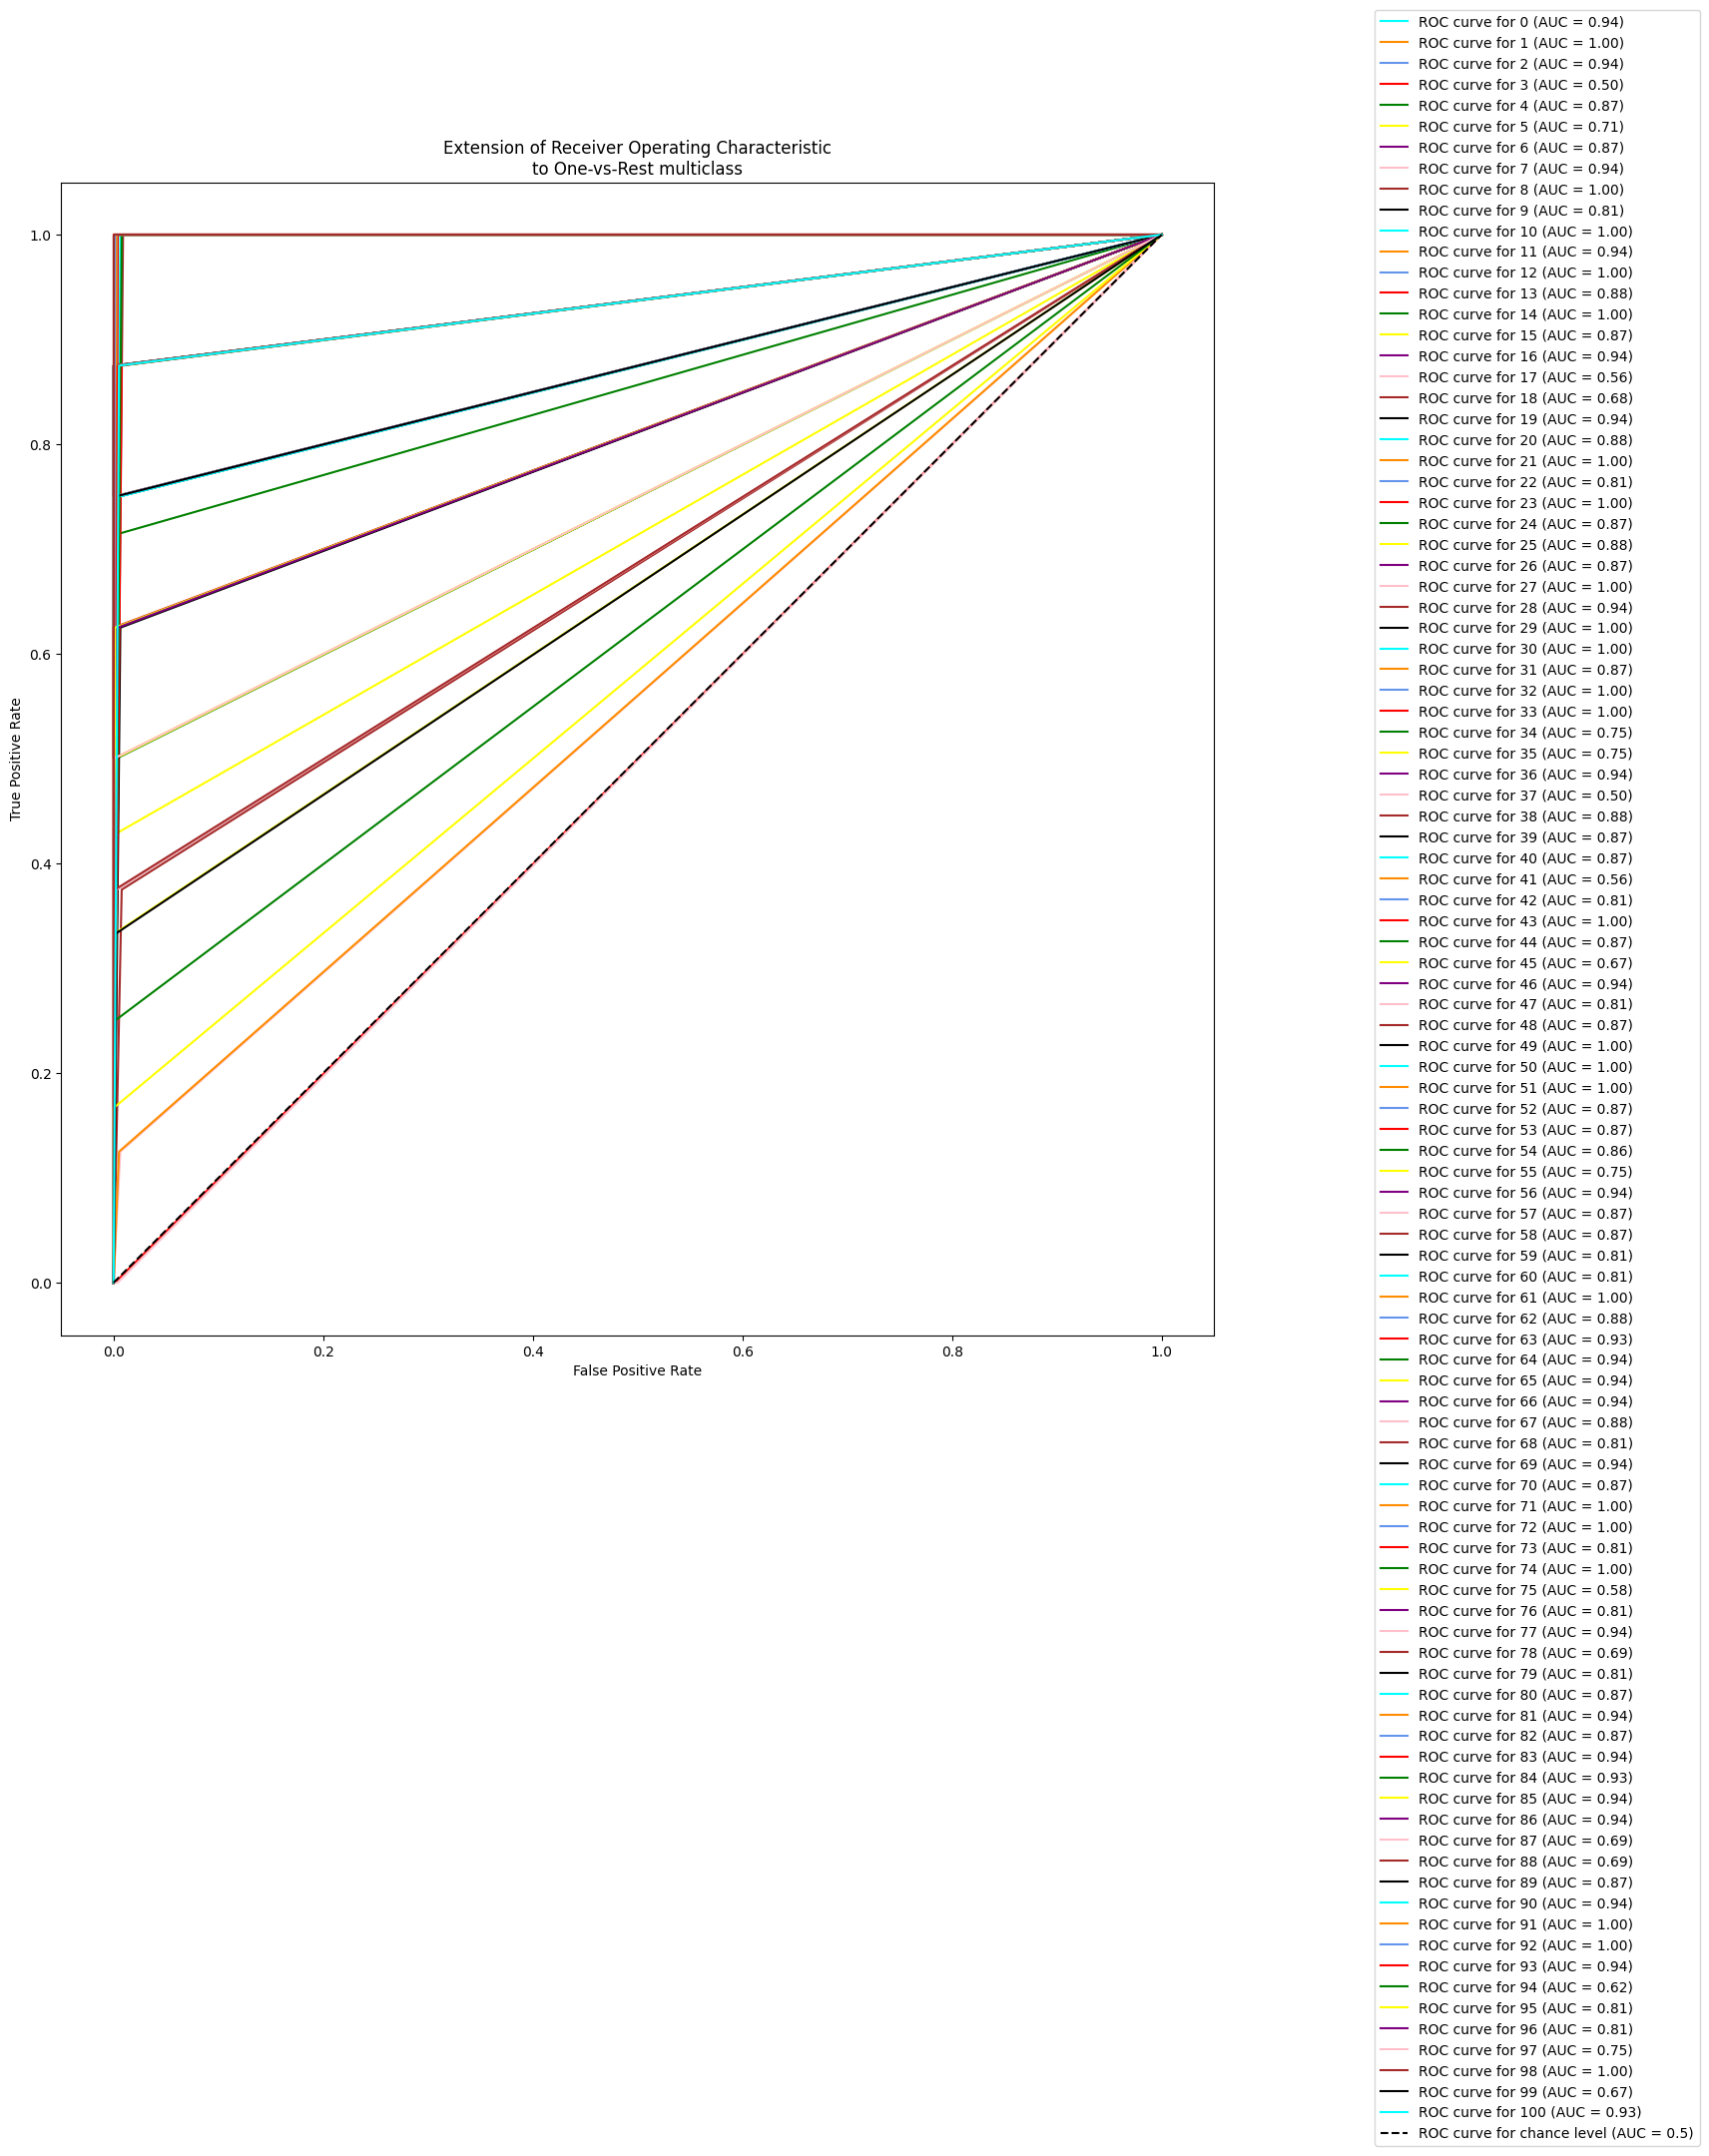

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       1.00      1.00      1.00         8
           2       0.88      0.88      0.88         8
           3       0.00      0.00      0.00         5
           4       0.67      0.75      0.71         8
           5       0.60      0.43      0.50         7
           6       0.86      0.75      0.80         8
           7       1.00      0.88      0.93         8
           8       0.53      1.00      0.70         8
           9       0.62      0.62      0.62         8
          10       0.62      1.00      0.76         8
          11       0.78      0.88      0.82         8
          12       0.80      1.00      0.89         8
          13       1.00      0.75      0.86         8
          14       0.57      1.00      0.73         8
          15       0.75      0.75      0.75         8
          16       1.00      0.88      0.93         8
          17       0.17    

In [10]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, output_size, num_epochs=15, multilabel=multilabel, report=True)